# **Evaluation - Problem 1**
**Load the data**

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
import copy
from tqdm import tqdm
import os
import sys
import json
from collections import Counter

# SELECT WHICH DATA TO LOAD
#20: for 20 sr and 100000 ar
#100: for 100 sr and 100000 ar
appendix = str(20)

# select current working directory and subfolder to save the files
current_directory = os.getcwd()
subfolder_path = 'data'

# select file path for standardroutes
file_path = os.path.join(current_directory, subfolder_path, str('standard' + appendix + '.json'))
with open(file_path, 'r') as file:
    org_standardroutes = json.load(file) #yaml.safe_load(file)

# select file path for actual routes
file_path = os.path.join(current_directory, subfolder_path, str('actual' + appendix + '.json')))
with open(file_path, 'r') as file:
    org_actual_routes = json.load(file)

# select file path for the parameter dictionary (to have the same parameters for creating new actual routes)
file_path = os.path.join(current_directory, subfolder_path, 'parameter_dictionary.json')
with open(file_path, 'r') as file:
    parameter_dictionary = json.load(file)

# assign each value to its name in order to be able to use them as variables
for key, value in parameter_dictionary.items():
    if key == 'df_drivers_attributes': locals()[key] = pd.DataFrame(value) #turn dictionary back to DF
    else: locals()[key] = value

# select file path for the recommended standardroutes
subfolder_path = 'results'
file_path = os.path.join(current_directory, subfolder_path, str('recStandard' + appendix + '.json'))
with open(file_path, 'r') as file:
    rec_standardroutes = json.load(file)
print('Number of recommended standardroutes:', len(rec_standardroutes))

# run another notebook to load the function compute_similarities() to compute the similarity scores for each standardroute-actual-route-pair
# this notebook also runs the notebook for data generation to load the function show_route() to visualize routes which is part of the similarity score functions
%run "functions_similarity_score_evaluation.ipynb"

Number of recommended standardroutes: 17
Functions for data generation successfully loaded.
Functions for similarity score computations successfully loaded.


In [4]:
# remove quantitites of 1
for route in rec_standardroutes:
    for trip in route['route']:
        liste = []
        merch = trip['merchandise']
        for product in merch.keys():
            if (merch[product] == 1): liste.append(product)
        for product in liste: del merch[product]

#for i in rec_standardroutes: show_route(i)

# **A: View Recommended Standardroutes**
**View appearance of cities, products and quantitites in the recommended standardroutes**

In [51]:
def fun_counts(routes):

    # create lists to store all cities, products and quantities of the recommended standardroutes
    cities_sr = []
    products_sr = []
    quantities_sr = []

    # create lists to store the number of trips and products
    num_of_trips = []
    num_of_products = []

    for route in routes:
        # get all cities (starting city first, then all destinations)
        route_c = [route['route'][0]['from']]
        route_c += [i['to'] for i in route['route']]
        num_of_trips.append(len(route_c)-1)

        # get all products (list per trip, then combine lists)
        route_p = [list(i['merchandise'].keys()) for i in route['route']]
        for trip in route_p: num_of_products.append(len(trip))
        route_p = [item for list in route_p for item in list]

        # get all quantities (list per trip, then combine lists)
        route_q = [i['merchandise'].values() for i in route['route']]
        route_q = [item for list in route_q for item in list]
        
        # append lists of route to the lists of all standardroutes
        cities_sr += route_c
        products_sr += route_p
        quantities_sr += route_q
    
    # count the appearances of all values in every list
    city_counts = dict(Counter(cities_sr))
    product_counts = dict(Counter(products_sr))
    quantitiy_counts = dict(Counter(quantities_sr))
    num_of_trips_counts = dict(Counter(num_of_trips))
    num_of_products_counts = dict(Counter(num_of_products))

    return city_counts, product_counts, quantitiy_counts, num_of_trips_counts, num_of_products_counts

org_city_counts, org_product_counts, org_quantitiy_counts, org_num_of_trips_counts, org_num_of_products_counts = fun_counts(org_standardroutes)
rec_city_counts, rec_product_counts, rec_quantitiy_counts, rec_num_of_trips_counts, rec_num_of_products_counts = fun_counts(rec_standardroutes)

In [68]:
org_num_trips_sum = np.sum(list(org_num_of_trips_counts))
rec_num_trips_sum = np.sum(list(rec_num_of_trips_counts))
np.sum(list(org_city_counts.values()))

123

In [69]:
rec_city_counts
org_city_counts
len(standardroutes)
len(rec_standardroutes)
np.sum(list({i: rec_city_counts[i] * (org_num_trips_sum/rec_num_trips_sum) for i in rec_city_counts}.values()))

97.61904761904762

In [42]:
{i: rec_city_counts[i] / org_city_counts[i] for i in rec_city_counts.keys()}

{'Verona': 0.6666666666666666,
 'Modena': 0.5555555555555556,
 'Pisa': 0.8,
 'Siena': 0.5,
 'Firenze': 1.0,
 'Bolzano': 0.42857142857142855,
 'Trento': 0.5555555555555556,
 'Milano': 0.5,
 'Rome': 1.2,
 'Napoli': 1.25,
 'Monza': 0.7142857142857143,
 'Venezia': 0.6666666666666666,
 'Bologna': 1.0,
 'Torino': 0.8333333333333334,
 'Bergamo': 0.7142857142857143,
 'Genova': 0.8333333333333334,
 'Lecce': 0.5,
 'Udine': 0.3,
 'Padova': 1.0,
 'Palermo': 0.16666666666666666}

In [38]:
city_pct_change = (rec_city_counts / org_city_counts) - 1
product_pct_change = (rec_product_counts / org_product_counts) - 1
quantity_pct_change = (rec_quantitiy_counts / org_quantitiy_counts) - 1

TypeError: unsupported operand type(s) for /: 'dict' and 'dict'

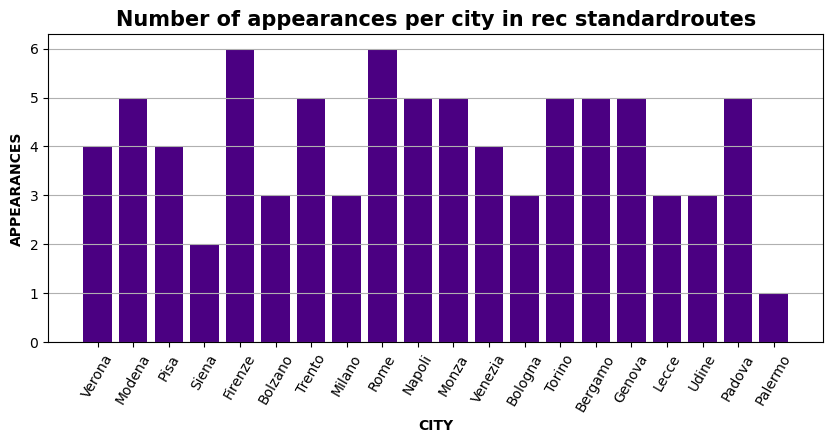

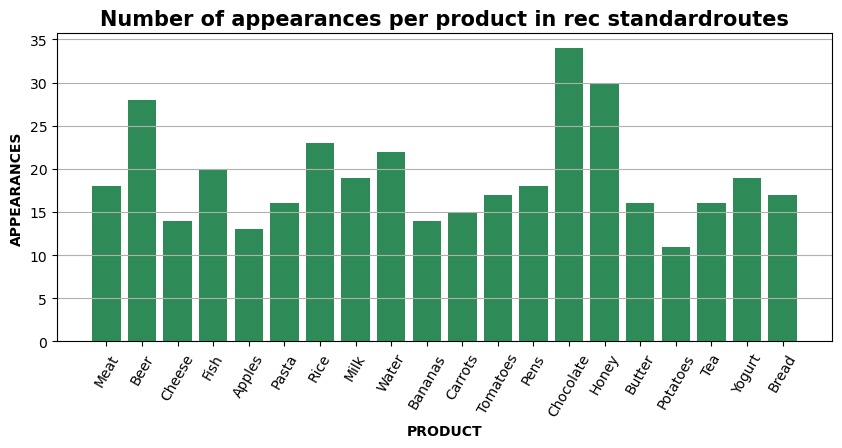

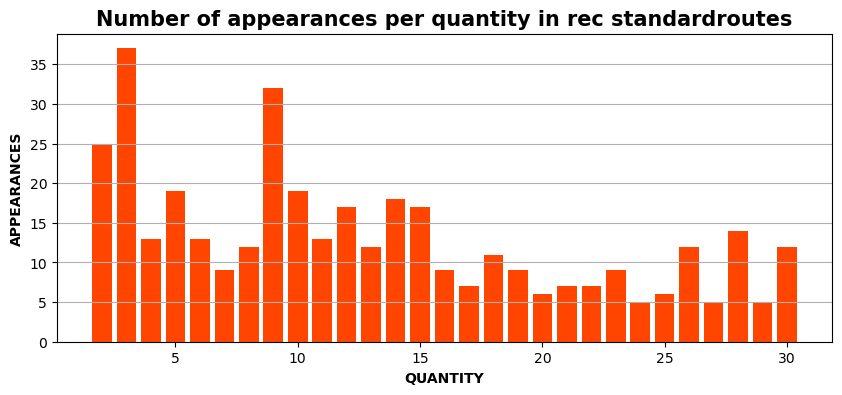

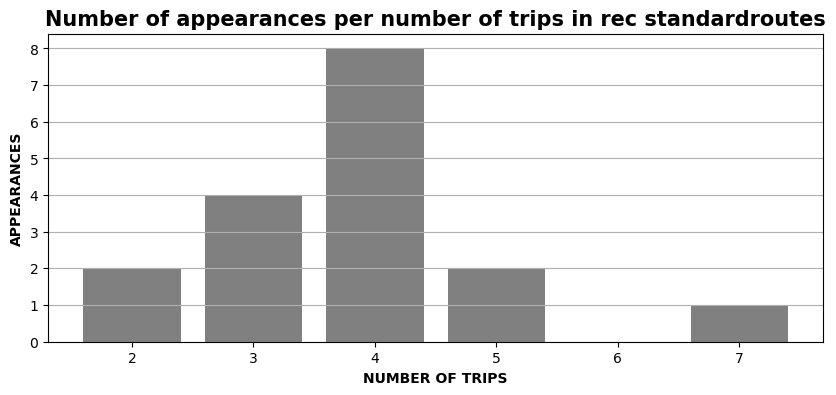

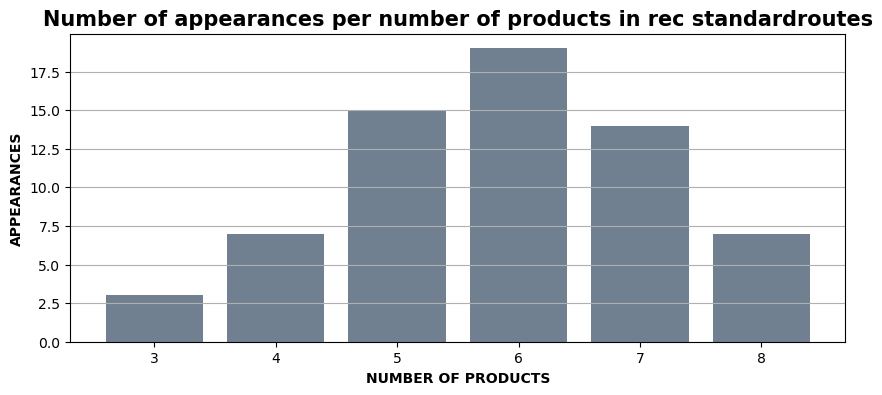

In [3]:
# function to plot the counts
def fun_plot_appearances(name, counts, color):

    # create barplot to view the number of appearances
    plt.figure(figsize=(10, 4))
    plt.bar(x=counts.keys(), height=counts.values(), color=color)

    # set title, edit axis and add legend
    plt.title('Number of appearances per {} in rec standardroutes'.format(name), fontsize=15, fontweight='bold')
    plt.ylabel('APPEARANCES', fontsize=10, fontweight='bold')
    plt.xlabel(name.upper(), fontsize=10, fontweight='bold')
    if isinstance(list(counts.keys())[0], str): plt.xticks(rotation=60)

    # grid lines
    plt.grid(True, axis='y')

    return plt.show()

# # execute function for a all count dicitonary
fun_plot_appearances('city', city_pct_change, 'indigo')
fun_plot_appearances('product', product_pct_change, 'seagreen')
fun_plot_appearances('quantity', quantity_pct_change, 'orangered')
fun_plot_appearances('number of trips', num_of_trips_counts, 'gray')
fun_plot_appearances('number of products', num_of_products_counts, 'slategrey')

### **B) Create the same amount of actual routes again with the recommended standardroutes**

In [4]:
# compute how many routes to generate
number_of_actual_routes = len(org_actual_routes)
jobs_per_route = int(number_of_actual_routes / len(rec_standardroutes))

# create new actual routes
rec_actual_routes = fun_aroutes(input_sr=rec_standardroutes, prints=False)

Processing:   0%|          | 0/17 [00:00<?, ?iteration/s]

Processing: 100%|██████████| 17/17 [03:51<00:00, 13.63s/iteration]


### **Compute similarity scores - for orginial standardroutes and recommended ones**

In [5]:
# compute similarity scores with original standardroutes
print('-------------------------Original standardroutes-------------------------')
org_scores = compute_similarites(input_sr=org_standardroutes, input_ar=org_actual_routes, prints=False)

# compute similarity scores with recommended standardroutes
print('------------------------Recommended standardroutes-----------------------')
rec_scores = compute_similarites(input_sr=rec_standardroutes, input_ar=rec_actual_routes, prints=False)

-------------------------Original standardroutes-------------------------


Processing: 100%|██████████| 100000/100000 [03:16<00:00, 508.17iteration/s]



All scores successfully computed.
Mean similarity score: 0.6137
------------------------Recommended standardroutes-----------------------


Processing: 100%|██████████| 99994/99994 [01:49<00:00, 910.74iteration/s] 


All scores successfully computed.
Mean similarity score: 0.6354


### **Analyse the similarity scores**

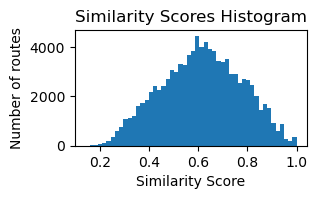

In [23]:
# plot a histogram to show the distribution of the similarity scores between 0 and 1
values = np.array([i['score'] for i in org_scores])
plt.figure(figsize=(3, 1.5))
plt.hist(values, density=False, bins=50)
plt.ylabel('Number of routes')
plt.xlabel('Similarity Score')
plt.title('Similarity Scores Histogram')
plt.show()

**View the similarity scores for each driver separately**

In [7]:
### ORIGINAL STANDARDROUTES
# dictionary to store the mean similarity score for each driver (given all original standardroutes)
mean_org_scores_d = {}

# loop to get for each driver the actual routes computed with the original standardroutes and compute the mean similarity
for driver in drivers:

    # extract the driver's similarity scores of all the similarity scores computed before and take the mean
    mean = np.mean([i['score'] for i in org_scores if i['driver'] == driver])

    # append the driver id and mean score to the dictionary
    mean_org_scores_d.update({driver: mean})

### RECOMMENDED STANDARDROUTES
# dictionary to store the mean similarity score for each driver (given all recommended standardroutes)
mean_rec_scores_d = {}

# loop to get for each driver the actual routes computed with all recommended standardroutes and compute the mean similarity
for driver in drivers:

    # extract the driver's similarity scores of all the similarity scores computed before and take the mean
    mean = np.mean([i['score'] for i in rec_scores if i['driver'] == driver])

    # append the driver id and mean score to the dictionary
    mean_rec_scores_d.update({driver: mean})

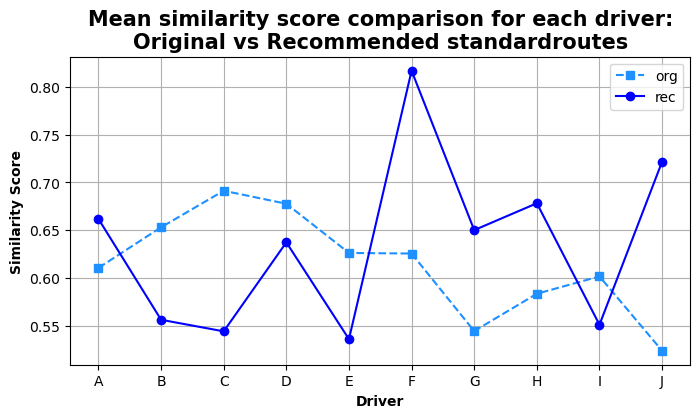

In [9]:
# funciton to compare similarity scores for each driver
def fun_plot_scores(scores1, scores2, color1, color2, label1, label2, title):

    # create plot to compare similarity scores
    plt.figure(figsize=(8, 4))
    plt.plot(drivers, scores1.values(), marker='s', linestyle='--', color=color1, label=label1)
    plt.plot(drivers, scores2.values(), marker='o', linestyle='-', color=color2, label=label2)

    # set title, edit axis and add legend
    plt.title(title, fontsize=15, fontweight='bold')
    plt.ylabel('Similarity Score', fontsize=10, fontweight='bold')
    plt.xlabel('Driver', fontsize=10, fontweight='bold')
    plt.legend(loc='upper right')

    # grid lines
    plt.grid(True)

    return plt.show()

# execute function to compare the scores of original and recommended standardroutes
fun_plot_scores(scores1=mean_org_scores_d, scores2=mean_rec_scores_d,
                color1='dodgerblue', color2='blue',
                label1='org', label2='rec',
                title='Mean similarity score comparison for each driver:\nOriginal vs Recommended standardroutes')

In [10]:
# # check if any similarity is zero and view the combinations with less than 0.3 similarity score
# print('Is any similarity score zero:', np.any(values == 0))
# #display([i for i in values if i < 0.3][:10])

# # view the combination with the lowest similarity score
# idx_min = np.argmin(values)
# lowest_score = [i for i in org_scores if i['id'] == str('a' + str(idx_min+1))][0]
# standardroute = [i for i in org_standardroutes if i['id'] == lowest_score['sroute']][0]
# actual_route = [i for i in org_actual_routes if i['id'] == lowest_score['id']][0]
# print("\nLowest score by standardroute '{}' and actual route '{}' from driver '{}' with {} similarity.".format(standardroute['id'], actual_route['id'], actual_route['driver'], np.round(np.min(values), 4)))

# # view details
# fun_similarity_score(route1=standardroute, route2=actual_route, prints=True)

**View the similarity scores for each standardroute separately**


In [11]:
# # plot a histogram for every standardroute to show the distribution
# standardroute_ids = [i['id'] for i in org_standardroutes]

# # define subplot grid
# fig, axs = plt.subplots(nrows=5, ncols=4, figsize=(20, 12))
# plt.subplots_adjust(hspace=0.5)
# fig.suptitle("Similarity Score distribution per standardroute", fontsize=18, y=0.95)

# # loop through standardroutes and axes
# for id, ax in zip(standardroute_ids, axs.ravel()):
#     values = [i['score'] for i in org_scores if i['sroute'] == id]
#     ax.hist(values, density=False, bins=50)
#     ax.set_ylabel('Number of routes')
#     ax.set_xlabel('Similarity Score')
#     ax.set_title(f'Standardroute {id}')

# plt.show()

**View the similarity scores for each driver separately**

In [12]:
# # plot a histogram for every driver to show the distribution
# drivers = np.sort(list(set([i['driver'] for i in org_actual_routes])))

# # define subplot grid
# fig, axs = plt.subplots(nrows=2, ncols=5, figsize=(22, 6))
# plt.subplots_adjust(hspace=0.5)
# fig.suptitle("Similarity Score distribution per driver", fontsize=18, y=0.95)

# # loop through drivers and axes
# for driver, ax in zip(drivers, axs.ravel()):
#     values = [i['score'] for i in org_scores if i['driver'] == driver]
#     ax.hist(values, density=False, bins=50)
#     ax.set_ylabel('Number of routes')
#     ax.set_xlabel('Similarity Score')
#     ax.set_title(f'driver {driver}')

# plt.show()

# **Evaluation - Problem 2**

### **Check whether the attributes of each driver are visible in the recommended standardroutes**

In [13]:
# select file path for recommended standardroutes of the drivers
subfolder_path = 'results'
file_path = os.path.join(current_directory, subfolder_path, str('driver' + appendix + '.json'))
with open(file_path, 'r') as file:
    rec_drivers = json.load(file)

display(rec_drivers)

[{'driver': 'A', 'routes': ['s14', 's3', 's13', 's4', 's16']},
 {'driver': 'B', 'routes': ['s8', 's16', 's3', 's7', 's9']},
 {'driver': 'C', 'routes': ['s6', 's9', 's16', 's20', 's8']},
 {'driver': 'D', 'routes': ['s3', 's6', 's14', 's12', 's4']},
 {'driver': 'E', 'routes': ['s15', 's9', 's11', 's20', 's3']},
 {'driver': 'F', 'routes': ['s3', 's16', 's14', 's13', 's4']},
 {'driver': 'G', 'routes': ['s6', 's14', 's16', 's20', 's8']},
 {'driver': 'H', 'routes': ['s8', 's3', 's15', 's6', 's11']},
 {'driver': 'I', 'routes': ['s8', 's7', 's13', 's3', 's2']},
 {'driver': 'J', 'routes': ['s14', 's3', 's13', 's16', 's4']}]

In [14]:
display(df_drivers_attributes, driver_cities, driver_products)

,likes short routes,likes long routes,likes a city,dislikes a city,likes few products,likes many products,likes a product,dislikes a product,likes high quantities,likes low quantities
driver_A,Yes,-,-,-,-,-,-,-,Yes,-
driver_B,-,Yes,-,-,-,Yes,-,-,-,-
driver_C,-,Yes,Yes,-,-,-,-,Yes,-,-
driver_D,-,-,-,Yes,-,-,-,-,Yes,-
driver_E,-,-,Yes,-,Yes,-,-,-,-,-
driver_F,Yes,-,-,-,-,Yes,-,-,-,-
driver_G,Yes,-,-,-,-,-,Yes,-,-,-
driver_H,-,-,-,Yes,-,Yes,-,Yes,-,-
driver_I,-,-,-,-,-,-,Yes,-,Yes,-
driver_J,Yes,-,-,-,-,-,-,-,-,Yes


{'driver_C': ['Trento', 'Verona'],
 'driver_D': ['Milano', 'Palermo', 'Lecce'],
 'driver_E': ['Rome', 'Padova'],
 'driver_H': ['Lecce', 'Palermo', 'Udine']}

{'driver_C': ['Water', 'Milk', 'Fish'],
 'driver_G': ['Beer', 'Cheese'],
 'driver_H': ['Fish', 'Bread', 'Tomatoes'],
 'driver_I': ['Chocolate', 'Honey']}

### **Compare Similarity Scores**

**Create new actual routes for each driver with only his 5 recommended standardroutes and compute the mean similarity scores**

In [15]:
# define how many actual routes should be created for each of the 5 standardroutes for each driver
jobs_per_route = 100

# calculate the amount of actual routes per driver and in total
number_of_actual_routes = jobs_per_route * 5 #5 recommended standardroutes for each driver
print('Number of actual routes per driver: {}'.format(number_of_actual_routes))
print('Number of actual routes in total: {}'.format(number_of_actual_routes*len(drivers)))

Number of actual routes per driver: 500
Number of actual routes in total: 5000


In [23]:
# dictionary to store the mean similarity score for each driver (given only the 5 recommended standardroutes)
mean_rec5_scores_d = {}

# loop to create for each driver new actual routes with its 5 recommended standardroutes and compute the mean similarity
for driver in tqdm(drivers):
    
    # select the ids of the 5 recommended standardroutes for the driver
    id_rec5_sr = [rec['routes'] for rec in rec_drivers if rec['driver'] == driver][0]
    #print(id_rec5_sr)
    
    # extract the routes with the ids out of all original standardroutes
    rec5_standardroutes = []
    for rec in id_rec5_sr:
        rec5_standardroutes.append([sr for sr in org_standardroutes if sr['id'] == rec][0])
    #for i in rec5_standardroutes: show_route(i)
    
    # create the actual routes for the driver
    actual_routes_driver = fun_aroutes(input_sr=rec5_standardroutes, driver_given=driver, prints=False, bar=False)

    # compute the similarity scores of all the just generated actual routes of the driver with its corresponding 5 recommended standardroutes for the driver
    scores_driver = compute_similarites(input_sr=rec5_standardroutes, input_ar=actual_routes_driver, prints=False, bar=False)

    # compute the mean similarity score of all scores for the driver
    mean = np.mean([i['score'] for i in scores_driver])

    # append the driver id and mean score to the dictionary
    mean_rec5_scores_d.update({driver: mean})

100%|██████████| 10/10 [00:13<00:00,  1.38s/it]


**Plot results**

Mean similarity score all standardroutes: 0.6137
Mean similarity score recommended 5 standardroutes: 0.6684


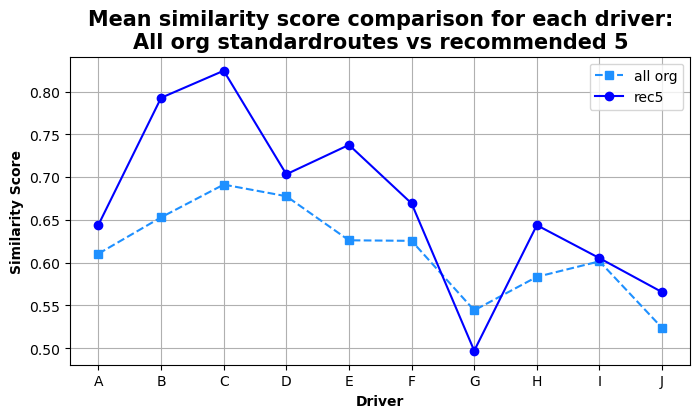

In [17]:
# compare mean similarity scores
print('Mean similarity score all standardroutes:', np.round(np.mean(list(mean_org_scores_d.values())), 4))
print('Mean similarity score recommended 5 standardroutes:', np.round(np.mean(list(mean_rec5_scores_d.values())), 4))

# use previous defined plot funciton to compare the mean scores for the drivers
fun_plot_scores(scores1=mean_org_scores_d, scores2=mean_rec5_scores_d, 
                color1='dodgerblue', color2='blue',
                label1='all org', label2='rec5',
                title='Mean similarity score comparison for each driver:\nAll org standardroutes vs recommended 5')

# **Evaluation - Problem 3**

In [18]:
# select file path for recommended standardroutes
subfolder_path = 'results'
file_path = os.path.join(current_directory, subfolder_path, str('perfectRoute' + appendix + '.json'))
with open(file_path, 'r') as file:
    perfectRoute = json.load(file)

#for i in perfectRoute: show_route(i)

In [19]:
# append an id to each perfect route
for idx, route in enumerate(perfectRoute):
    route.update({'id':idx+1})

In [20]:
# define how many actual routes should be created for each of the 5 standardroutes for each driver
jobs_per_route = 100

# calculate the amount of actual routes per driver and in total
number_of_actual_routes = jobs_per_route #only one perfect route for each driver
print('Number of actual routes per driver: {}'.format(number_of_actual_routes))
print('Number of actual routes in total: {}'.format(number_of_actual_routes*len(drivers)))

Number of actual routes per driver: 100
Number of actual routes in total: 1000


**Create new actual routes for each driver with his perfect route and compute the mean similarity scores**

In [21]:
# dictionary to store the mean similarity score for each driver
perfect_scores_d = {}

# loop to create for each driver new actual routes with its perfect standardroute and compute the similarity
for driver in tqdm(drivers):
    
    # select the driver's perfect route
    perfect_standardroute = [i for i in perfectRoute if i['driver'] == driver]
    #print(perfect_standardroute)
    
    # create the actual routes for the driver
    actual_routes_driver = fun_aroutes(input_sr=perfect_standardroute, driver_given=driver, prints=False, bar=False)

    # compute the similarity scores of all the just generated actual routes of the driver with its corresponding 5 recommended standardroutes for the driver
    scores_driver = compute_similarites(input_sr=perfect_standardroute, input_ar=actual_routes_driver, prints=False, bar=False)

    # compute the mean similarity score of all scores for the driver
    mean = np.mean([i['score'] for i in scores_driver])

    # append the driver id and mean score to the dictionary
    perfect_scores_d.update({driver: mean})

100%|██████████| 10/10 [00:01<00:00,  5.90it/s]


Mean similarity score all standardroutes: 0.6137
Mean similarity score perfect standardroute: 0.9668


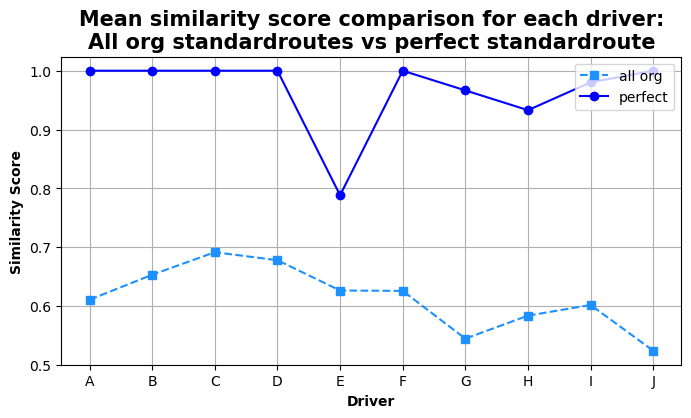

In [24]:
# compare mean similarity scores
print('Mean similarity score all standardroutes:', np.round(np.mean(list(mean_org_scores_d.values())), 4))
print('Mean similarity score perfect standardroute:', np.round(np.mean(list(perfect_scores_d.values())), 4))

# use previous defined plot funciton to compare the mean scores for the drivers
fun_plot_scores(scores1=mean_org_scores_d, scores2=perfect_scores_d, 
                color1='dodgerblue', color2='blue',
                label1='all org', label2='perfect',
                title='Mean similarity score comparison for each driver:\nAll org standardroutes vs perfect standardroute')